# Prerequisite

First of all, mount drive with all the stuff

In [ ]:


from google.colab import drive
drive.mount('/drive', force_remount=True)

Mounted at /drive


Check if it mounted properly

In [ ]:
import os
os.listdir(r'/drive/My Drive/monoloco/source_code')

['README.md',
 'LICENSE.AGPL',
 'LICENSE',
 'setup.py',
 'monoloco.egg-info',
 'docs',
 'monoloco',
 'splits',
 'tests',
 'data',
 'workdir',
 '.git',
 'homogenus_v1_0',
 'samples',
 'openpose']

Lets install the dependencies:
(this one is a conflict, so it is installed separately)

In [ ]:
import os
os.environ['ANNOTATION_DIR'] = 'data/ann_new'

In [ ]:
!pip install "imgaug<0.2.7"
!pip install nuscenes-devkit

     |████████████████████████████████| 634kB 6.0MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654021 sha256=28f2ab5307c2c6a96eb64d000aa30622a41ff65ea9e4be7fe20d26d21013e73d
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
     |████████████████████████████████| 266kB 5.4MB/s 
     |████████████████████████████████| 81kB 6.7MB/s 
     |████████████████████████████████| 143kB 10.0MB/s 
  Created wheel for fire: filename=fire-0.3.1-py2.py3-none-any.whl size=111005 sha256=fbe6eb84d8cbcf092ce99693bc0a26509f138b73375e64fca1171df5cd3d7bee
  Stored in directory: /root/.cache/pip/wheels/c1/61/df/768b03527bf006b546dce284eb4249b185669e65afc5fbb2ac
Successfully built fire


In [ ]:
!cd "/drive/My Drive/monoloco/source_code" && pip3 install -e '.[test, prep]'

Obtaining file:///drive/My%20Drive/monoloco/source_code
     |████████████████████████████████| 676.9MB 25kB/s 
     |████████████████████████████████| 2.0MB 38.4MB/s 
     |████████████████████████████████| 2.6MB 44.9MB/s 
     |████████████████████████████████| 184kB 47.3MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 122kB 45.1MB/s 
     |████████████████████████████████| 307kB 46.0MB/s 
     |████████████████████████████████| 71kB 8.2MB/s 
     |████████████████████████████████| 215kB 39.1MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 1.4MB 45.4MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 747kB 44.2MB/s 
  Created wheel for openpifpaf: filename=openpifpaf-0.9.0-cp36-cp36m-linux_x86_64.whl size=375584 sha256=02cc74921452abc3fb52f5d89bb4a2c321c208825e7fa6f3dc48fe13c5c85d8c
  Stored in directory: /root/.cache/pip/wheels/7c/f9/a

Now we are able to run monoloco via shell

In [ ]:
!python3 -m monoloco.run predict --help

usage: run.py predict [-h] [--networks NETWORKS [NETWORKS ...]] [--glob GLOB]
                      [-o OUTPUT_DIRECTORY]
                      [--output_types OUTPUT_TYPES [OUTPUT_TYPES ...]]
                      [--show] [--checkpoint CHECKPOINT] [--dilation DILATION]
                      [--dilation-end DILATION_END] [--basenet BASENET]
                      [--headnets HEADNETS [HEADNETS ...]] [--no-pretrain]
                      [--two-scale] [--head-dropout HEAD_DROPOUT]
                      [--head-quad HEAD_QUAD]
                      [--head-kernel-size HEAD_KERNEL_SIZE]
                      [--head-padding HEAD_PADDING]
                      [--head-dilation HEAD_DILATION]
                      [--seed-threshold SEED_THRESHOLD]
                      [--instance-threshold INSTANCE_THRESHOLD]
                      [--keypoint-threshold KEYPOINT_THRESHOLD]
                      [--decoder-workers DECODER_WORKERS]
                      [--no-force-complete-pose]
            

And do imports as well

In [ ]:
import monoloco
print(dir(monoloco))

# Doing stuff

First of all, we need pifpaf models to get an annotations

This can be done with this:

In [ ]:
!cd "/drive/My Drive/monoloco/source_code" && mkdir -p data/ann && python -m monoloco.run predict --network pifpaf --model data/models/resnet50-200527-171310-cif-caf-caf25-o10s-c0b7ae80.pkl --checkpoint resnet50 --glob data/images/006062.png -o data/ann

Downloading: "https://storage.googleapis.com/openpifpaf-pretrained/v0.8.0/resnet50block5-pif-paf-edge401-190625-025154-4e47f5ec.pkl" to /root/.cache/torch/checkpoints/resnet50block5-pif-paf-edge401-190625-025154-4e47f5ec.pkl
100% 101495655/101495655 [00:00<00:00, 120354606.75it/s]
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'openpifpaf.network.nets.Shell' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
INFO:root:selected decoder: PifPaf
Num of images to process: 1
image 0 data/images/006062.png data/ann/006062.png
INFO:openpifpaf.decoder.processor:1 annotations: [15]
Image 0
------------------------------------------------------------------------------------------------------------------------


This is result file with annotations

In [ ]:
!cd "/drive/My Drive/monoloco/source_code" && cat data/ann/006062.png*

[{"keypoints": [616.1, 182.3, 0.8, 618.0, 180.8, 0.7, 615.6, 180.6, 0.6, 622.6, 181.5, 0.8, 619.6, 181.8, 0.0, 620.7, 190.9, 0.9, 623.6, 190.0, 0.8, 613.3, 201.3, 1.0, 615.9, 198.7, 0.4, 603.1, 197.6, 0.9, 605.4, 195.7, 0.0, 616.1, 214.1, 0.9, 620.2, 213.2, 0.9, 611.7, 232.2, 0.9, 617.8, 231.1, 0.7, 611.3, 251.8, 0.8, 620.2, 249.3, 0.6], "bbox": [603.1201171875, 180.58486938476562, 623.613525390625, 251.84043884277344]}]

Lets create annotations for all images

In [ ]:
!cd "/drive/My Drive/monoloco/source_code" && mkdir -p ${ANNOTATION_DIR} && python -m monoloco.run predict --network pifpaf --model data/models/.pkl --checkpoint resnet152 --glob 'data/kitti/images/001*.png' -o ${ANNOTATION_DIR}

Once you have an annotations, you may prepare data for training which will prepare joints for training and put them to `data/arrays`

In [ ]:
!cd "/drive/My Drive/monoloco/source_code" && python -m monoloco.run prep --dir_ann ${ANNOTATION_DIR} --dataset kitti 

Saved 2058 annotations for phase train
Saved 2363 annotations for phase val
Saved 0 annotations for phase test
Number of GT files: 7479. Files with at least one pedestrian: 2500.  Files not found: 2
Matched : 69.8 % of the ground truth instances

Output files:
data/arrays/names-kitti-201111-2204.json
data/arrays/joints-kitti-201111-2204.json



and do training itself

In [ ]:
# os.environ['JOINTS_DIR'] = 'data/arrays/joints-kitti-190716-1618.json'
# os.environ['JOINTS_DIR'] = 'data/arrays/joints-kitti-201110-2222.json'
os.environ['JOINTS_DIR'] = 'data/arrays/joints-kitti-201111-2204.json'

In [ ]:
!cd "/drive/My Drive/monoloco/source_code" && python -m monoloco.run train --joints ${JOINTS_DIR} --n_stage=1 --activation=Swish --hidden_size=128

2020-11-28 23:14:37.771640: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Training arguments: 
epochs: 150 
batch_size: 256 
dropout: 0.2
baseline: False 
learning rate: 0.002 
scheduler step: 20 
scheduler gamma: 0.9  
input_size: 34 
hidden_size: 128 
n_stages: 1 
r_seed: 1
input_file: data/arrays/joints-kitti-201111-2204.json
Device:  cpu
Sizes of the dataset: {'train': 4116, 'val': 4726, 'test': 0}
>>> creating model
Activation function <class 'monoloco.network.architectures.Swish'>, input_size = 34, linear_size=128
<class 'monoloco.network.architectures.Linear'>
>>> total params: 0.04M
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
Epoch: 146   Training Loss: 1.327   Val Loss 1.327	

-------------------------------------------------

In [ ]:
# os.environ['MODEL_PATH'] = 'data/models/monoloco-201108-2357.pkl'
#os.environ['MODEL_PATH'] = 'data/models/monoloco-201111-0910.pkl'
#os.environ['MODEL_PATH'] = 'data/models/monoloco-201111-2302.pkl'
#os.environ['MODEL_PATH'] = 'data/models/monoloco-201112-2314.pkl'
#os.environ['MODEL_PATH'] = 'data/models/monoloco-201112-2335.pkl'  # RELU
os.environ['MODEL_PATH'] = 'data/models/monoloco-201113-0004.pkl'  # GELU
#os.environ['MODEL_PATH'] = 'data/models/monoloco-201112-2355.pkl' # GELU 5 stage
os.environ['MODEL_PATH'] = 'data/models/monoloco-201113-0018.pkl' # GELU
os.environ['MODEL_PATH'] = 'data/models/monoloco-201120-1252.pkl' # RELU



If you succeeded, take an output model  (which is located in  `data/models/monoloco-201029-1010.pkl`)  

Code below now executes prediction for an image using trained model, and an original one: 

Downloading: "https://storage.googleapis.com/openpifpaf-pretrained/v0.8.0/resnet152block5-pif-paf-edge401-190625-185426-3e2f28ed.pkl" to /root/.cache/torch/checkpoints/resnet152block5-pif-paf-edge401-190625-185426-3e2f28ed.pkl
100%|██████████| 240552867/240552867 [00:06<00:00, 35921634.42it/s]
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'openpifpaf.network.nets.Shell' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
INFO:root:selected decoder: PifPaf
Num of images to process: 1
INFO:openpifpaf.decoder.processor:16 annotations: [17, 17, 15, 16, 14, 14, 12, 12, 15, 12, 9, 7, 9, 10, 9, 10]
image 0 /drive/My Drive/monoloco/source_code/data/workdir/prediction_2020-11-21-21-26-1605993976/monoloco-190719-0923.png /drive/My Drive/monoloco/source_code/

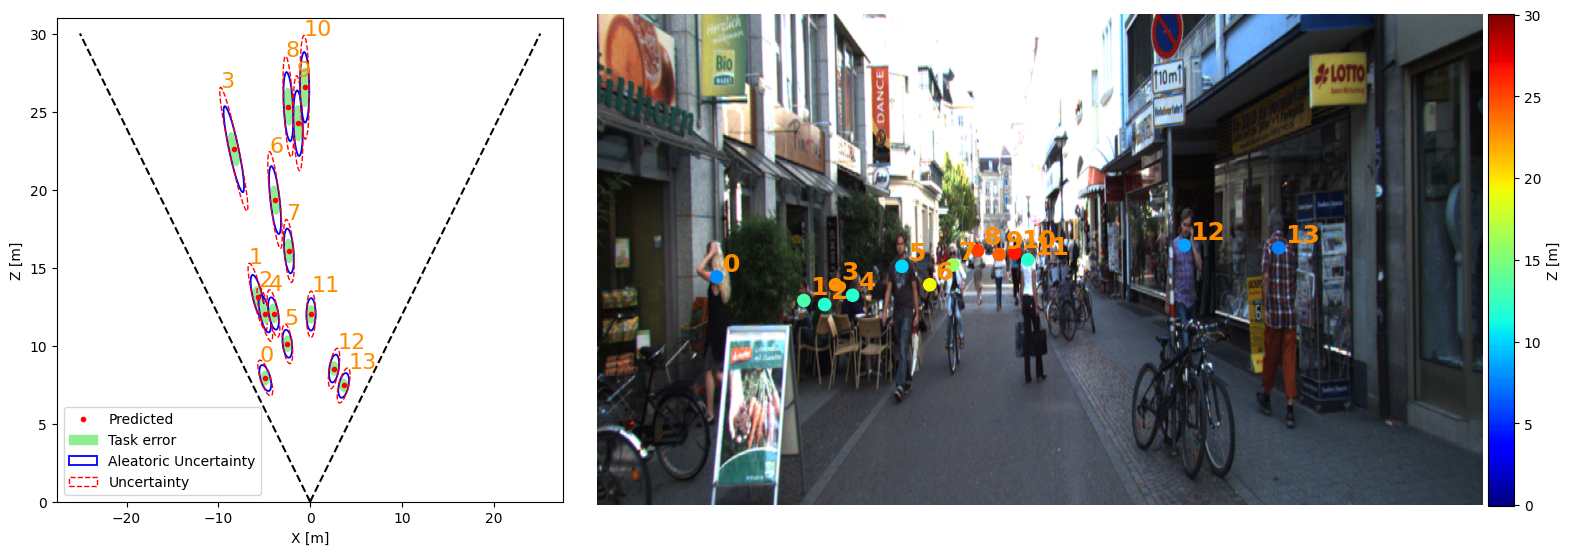

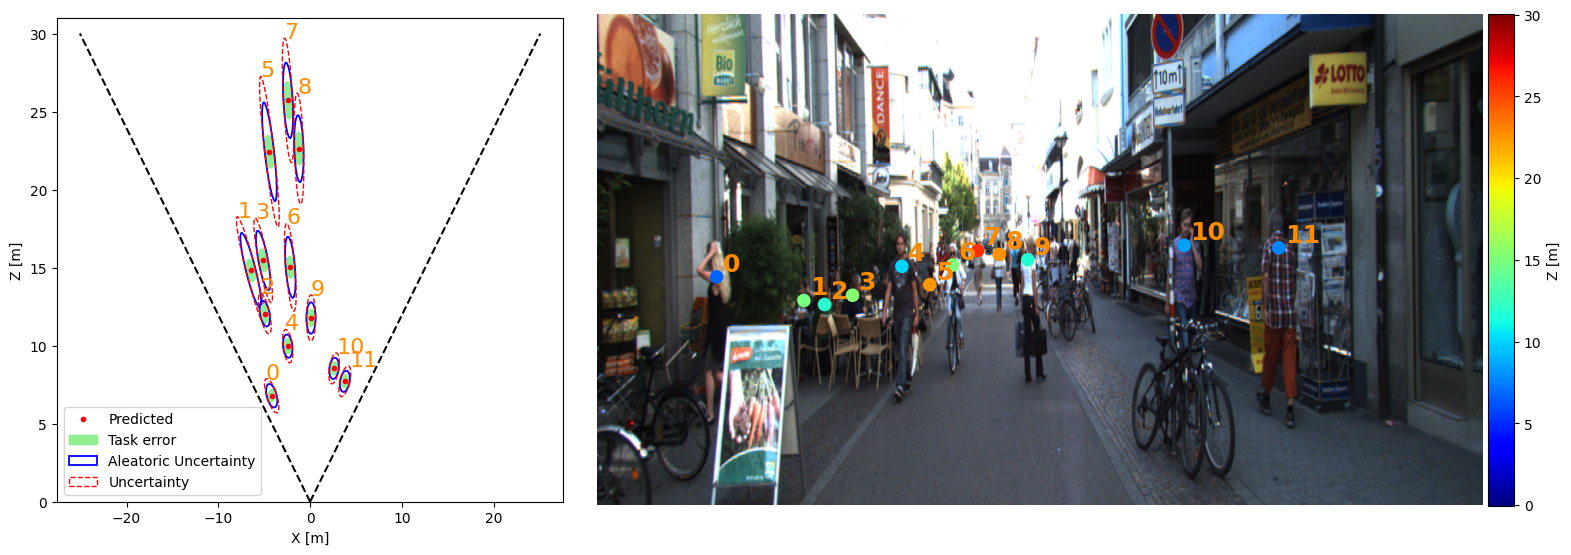

In [ ]:
import shutil
import os
import datetime
import glob
import subprocess
from IPython.display import Image,display

directory = '/drive/My Drive/monoloco/source_code'
src_file = os.path.join(directory, 'data/kitti/images/002282.png')
original_model = 'data/models/monoloco-190719-0923.pkl'
trained_model = 'data/models/monoloco-201029-1010.pkl'
another_model = os.environ['MODEL_PATH']
date_ = datetime.datetime.now()

fname = f"prediction_{date_.strftime('%Y-%m-%d-%H-%M-%s')}"
workdir = os.path.join(directory, 'data', 'workdir', fname)

if not os.path.exists(workdir):
  os.makedirs(workdir)

for model in [original_model, trained_model, another_model]:
  ext = os.path.splitext(src_file)[1]
  basename = os.path.splitext(os.path.basename(model))[0]
  input_image = shutil.copy(src_file, os.path.join(workdir, basename) + ext)
  process_handle =  subprocess.run(
      ["python3","-m", "monoloco.run", "predict", "--glob", input_image, '--output_types', "combined",
      "--scale", "2", "--model", model,  "--n_dropout", "50", "--z_max", "30",],
      cwd=directory,
      stdout=subprocess.PIPE,
      stderr=subprocess.STDOUT
  )
  print(process_handle.stdout.decode('utf-8'))

for image_file in glob.glob(os.path.join(workdir, '*.png.combined.png')):
  display(Image(image_file))


In [ ]:
!pip install torch==1.1.0


In [ ]:
!cd "/drive/My Drive/monoloco/source_code" && python3 -m monoloco.run eval --generate --geometric --model data/models/monoloco-190719-0923.pkl --joints data/arrays/joints-kitti-201111-2204.json --dir_ann data/ann_new --save
!cat "/drive/My Drive/monoloco/source_code/data/kitti/monoloco/calculation_time.txt"

2020-11-28 23:23:27.386426: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
INFO:monoloco.eval.geom_baseline:Computed distance of 8842 annotations
INFO:monoloco.eval.geom_baseline:Average height of segment head_shoulder is 17.74 with a std of 3.53
INFO:monoloco.eval.geom_baseline:Average height of segment shoulder_hip is 48.57 with a std of 6.05
INFO:monoloco.eval.geom_baseline:Average height of segment hip_ankle is 70.17 with a std of 11.23
INFO:monoloco.eval.geom_baseline:Average error over the val set for clst 10: 0.67
INFO:monoloco.eval.geom_baseline:Average error over the val set for clst 20: 1.31
INFO:monoloco.eval.geom_baseline:Average error over the val set for clst 30: 2.08
INFO:monoloco.eval.geom_baseline:Average error over the val set for clst all: 1.33
INFO:monoloco.eval.geom_baseline:Joints used: data/arrays/joints-kitti-201111-2204.json
Activation function <class 'torch.nn.modules.activation.ReLU'>, inp

Streaming output truncated to the last 5000 lines.
Output data/kitti/monoloco-usual-1606607609.435039/004508.txt: ([[423.458056, 146.342172, 524.96089, 309.009375]], [8.730811489997308])
Output data/kitti/monoloco-size-256-layers-3-act-ReLU-1606607801.144803/004508.txt: ([[423.458056, 146.342172, 524.96089, 309.009375]], [8.730811489997308])
Output data/kitti/monoloco-size-256-layers-3-act-Swish-1606608001.281044/004508.txt: ([[423.458056, 146.342172, 524.96089, 309.009375]], [9.132969365738287])
processing 001549.txt (776 of 3768)
Output data/kitti/monoloco-usual-1606607609.435039/001549.txt: ([[772.624765, 158.659476, 816.952018, 261.076028], [842.885062, 153.147877, 881.506967, 237.63792], [257.882193, 165.95016, 336.770517, 335.989033], [487.422559, 165.988323, 505.790453, 211.399937], [0.0, 157.083801, 77.155724, 284.919067]], [10.948485848727804, 15.647814105603663, 8.666255423549089, 27.50807414853541, 4.913752085313625])
Output data/kitti/monoloco-size-256-layers-3-act-ReLU-160

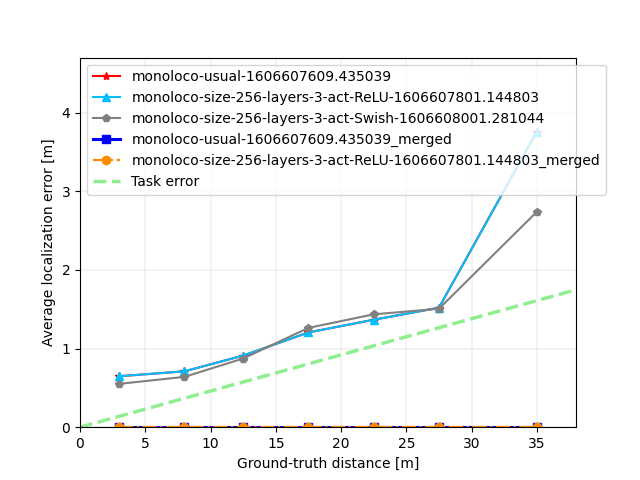

In [ ]:
import subprocess
import os
import sys
import re
import shutil
import datetime
from IPython.display import Image,display


def print_proc(process):
  lines = []

  while True:
      output = process.stderr.readline()
      
      if output:
          lines.append(output.strip().decode('ascii'))
  return '\n'.join(lines)

root_dir = '/drive/My Drive/monoloco/source_code'
joints = os.environ['JOINTS_DIR']
annotations = os.environ['ANNOTATION_DIR']




def evaluate(params, name):
  command = ['python', '-m', 'monoloco.run', 'train', '--joints', joints,]
  command.extend(params)
  with subprocess.Popen(command,
                        stdout=subprocess.PIPE,
                        stderr=subprocess.PIPE,
                        bufsize=1,
                        universal_newlines=True,
                        cwd=root_dir) as proc:
    stdout, stderr = proc.communicate()
    print(stdout)
    print(stderr)
    groups = re.findall(r'model saved\: (.*)', stderr)[0].split()
    print(groups)
    model_path = groups[0]
    
  cmd = ['python3', '-m', 'monoloco.run', 'eval', '--generate',
                        '--model', model_path, '--joints', joints, '--dir_ann', annotations, '--save']
  cmd.extend(params)
  print(cmd)
  with subprocess.Popen(cmd,
                        stdout=subprocess.PIPE, stderr=subprocess.PIPE,
                        bufsize=1,
                        universal_newlines=True,
                        cwd=root_dir) as eval_proc:
    stdout, stderr = eval_proc.communicate()

    folder = os.path.join(root_dir,'docs/results')
    if not os.path.exists(folder):
      os.makedirs(folder)
    print(stdout)
    print(stderr)
    ts = datetime.datetime.now().timestamp()
    dst = os.path.join(folder, f'results-{name}-{ts}.png')
    src_image = os.path.join(root_dir, 'docs/results_mono.png')
    results_dir = os.path.join(root_dir, 'data/kitti/monoloco')
    results_dir_dst = os.path.join(root_dir, f'data/kitti/monoloco-{name}-{ts}')
    shutil.move(src_image, dst)
    shutil.move(results_dir, results_dir_dst)
    return f'monoloco-{name}-{ts}'

params = [
    [[], 'usual'],
]
for i in [ '3']:
  for j in ['256']:
    for k in ['ReLU', 'Swish']:
      params.append([['--hidden_size', j, '--n_stage', i,
                     '--activation', k],  f'size-{j}-layers-{i}-act-{k}'])

print(params)
ls = []
for tup in params:
  method_name = evaluate(*tup)
  ls.append(method_name)


with subprocess.Popen(['python3', '-m', 'monoloco.run', 'eval', '--joints', joints, '--dir_ann', annotations, '--save', '--model', 'somestr',
                        '--methods', ','.join(ls)],
                      stdout=subprocess.PIPE, stderr=subprocess.PIPE,
                      bufsize=1,
                      universal_newlines=True,
                      cwd=root_dir) as eval_proc:
  stdout, stderr = eval_proc.communicate()

  folder = os.path.join(root_dir,'docs/results')
  if not os.path.exists(folder):
    os.makedirs(folder)
  print(stdout)
  print(stderr)
  ts = datetime.datetime.now().timestamp()
  dst = os.path.join(folder, f'results-total-{ts}.png')
  src_image = os.path.join(root_dir, 'docs/results_mono.png')
  results_dir = os.path.join(root_dir, 'data/kitti/monoloco')
  results_dir_dst = os.path.join(root_dir, f'data/kitti/monoloco-total-{ts}')
  shutil.move(src_image, dst)

display(Image(dst))

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

In [ ]:
!cd "/drive/My Drive/monoloco/source_code" && python3 -m monoloco.run eval --model data/models/monoloco-190719-0923.pkl --geometric --joints data/arrays/joints-kitti-201029-1008.json --methods monoloco-size-256-layers-1-act-ReLU-1606429323.950038,monoloco-size-256-layers-1-act-Swish-1606429425.293663,monoloco-size-256-layers-1-act-GeLU-1606429525.026946,monoloco-size-128-layers-1-act-ReLU-1606429592.28154,monoloco-size-128-layers-1-act-Swish-1606429664.65446,monoloco-size-128-layers-1-act-GeLU-1606429732.566927,monoloco-size-64-layers-1-act-ReLU-1606429790.662646,monoloco-size-64-layers-1-act-Swish-1606429851.227329,monoloco-size-64-layers-1-act-GeLU-1606429907.986845,monoloco-size-256-layers-2-act-GeLU-1606430339.64828,monoloco-size-128-layers-2-act-ReLU-1606430428.084697,monoloco-size-128-layers-2-act-Swish-1606430518.637922,monoloco-size-128-layers-2-act-GeLU-1606430608.117143,monoloco-size-64-layers-2-act-ReLU-1606430673.842432,monoloco-size-64-layers-2-act-Swish-1606430743.390403,monoloco-size-64-layers-2-act-GeLU-1606430809.482368,monoloco-size-256-layers-3-act-ReLU-1606430996.954842,monoloco-size-256-layers-3-act-Swish-1606431187.934663,monoloco-size-256-layers-3-act-GeLU-1606431372.175402,monoloco-size-128-layers-3-act-ReLU-1606431477.476801,monoloco-size-128-layers-3-act-Swish-1606431586.218259,monoloco-size-128-layers-3-act-GeLU-1606431694.931855,monoloco-size-64-layers-3-act-ReLU-1606431770.903014,monoloco-size-64-layers-3-act-Swish-1606431850.502745,monoloco-size-64-layers-3-act-GeLU-1606431927.600858,monoloco-usual-1606429225.158123,monoloco-size-256-layers-2-act-ReLU-1606430052.071073,monoloco-size-256-layers-2-act-Swish-1606430199.747754 --save

Traceback (most recent call last):
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/drive/My Drive/monoloco/source_code/monoloco/run.py", line 168, in <module>
    main()
  File "/drive/My Drive/monoloco/source_code/monoloco/run.py", line 138, in main
    from .eval import geometric_baseline
  File "/drive/My Drive/monoloco/source_code/monoloco/eval/__init__.py", line 3, in <module>
    from .generate_kitti import GenerateKitti
  File "/drive/My Drive/monoloco/source_code/monoloco/eval/generate_kitti.py", line 15, in <module>
^C


In [ ]:
!cd "/drive/My Drive/monoloco/source_code" 

# Evaluate


First, lets get geometrical baseline method results.

We also have `--generate` flag here, because evaluation is built over the results of kitti evaluation, which is stored as result files
:

In [ ]:
#os.environ['MODEL_PATH'] = 'data/models/monoloco-201029-1010.pkl'
#os.environ['ANNOTATION_DIR'] = 'data/ann'
#os.environ['JOINTS_DIR'] = 'data/arrays/joints-kitti-201029-1008.json'

# Original joints and model
#os.environ['MODEL_PATH'] = 'data/models/monoloco-190719-0923.pkl'
#os.environ['ANNOTATION_DIR'] = 'data/ann'
#os.environ['JOINTS_DIR'] = 'data/arrays/joints-kitti-190716-1618.json'



In [ ]:
!echo $MODEL_PATH
!cd "/drive/My Drive/monoloco/source_code" && python3 -m monoloco.run eval --generate --geometric --model ${MODEL_PATH} --joints ${JOINTS_DIR} --dir_ann ${ANNOTATION_DIR} --save
from IPython.display import Image,display

display(Image('/drive/My Drive/monoloco/source_code/docs/results_mono.png'))

In [ ]:
data = """
monoloco-size-256-layers-1-act-ReLU-1606429323.950038	0.0008083218782902525	0.0008667461143052282	0.0008789007214532382	0.0008566202940764251	0.0008266136564057449	0.000957489013671875	0.0010171183224382072	0.0008322874704996745	0.0009261667728424072	0.0009410942302030675	0.0008794996473524305	0.0009355346361796061	0.0009220296686345881	0.001061946153640747	0.00090789794921875	0.0008925795555114746	0.0009480317433675131	0.0008931159973144531
monoloco-size-256-layers-1-act-Swish-1606429425.293663	0.0008404768254768335	0.0008891811055585372	0.0009266397227411685	0.0010543399386935765	0.00102148384883486	0.0010316286768232072	0.0009749264552675445	0.0009170691172281901	0.0011321008205413818	0.0009386819951674517	0.0009190109041002062	0.0009366671244303385	0.001136259599165483	0.0009471774101257324	0.0009768009185791016	0.0011225342750549316	0.0010462601979573567	0.0013446807861328125
monoloco-size-256-layers-1-act-GeLU-1606429525.026946	0.0008083781557220021	0.0008276533489384927	0.0008386218029519786	0.0008208751678466797	0.0008486139363255994	0.0009345667702811104	0.0008474136220997777	0.0009516557057698568	0.0009540915489196777	0.0008554598864387063	0.0009043878979153103	0.0009613633155822754	0.0009171095761385831	0.0009666085243225098	0.0008840560913085938	0.0009596347808837891	0.0009758472442626953	0.0010478496551513672
monoloco-size-128-layers-1-act-ReLU-1606429592.28154	0.0007362373327714594	0.0007494894926213036	0.0007493703261665676	0.0007656768516257957	0.00071759059511382	0.000800882066999163	0.0008147091701112945	0.0008243242899576823	0.0007325559854507446	0.0007616772371179917	0.0007589525646633572	0.0007918278376261393	0.0007559386166659268	0.0007978379726409912	0.0008672475814819336	0.0008370876312255859	0.0008031527201334635	0.00080108642578125
monoloco-size-128-layers-1-act-Swish-1606429664.65446	0.0008396851389031662	0.0008573098616166549	0.0008330828901650249	0.000822217376143844	0.0009060563712284483	0.0009050369262695312	0.0009948220746270541	0.0008704185485839844	0.0008880794048309326	0.0008730327381807216	0.0009861654705471462	0.0010249416033426921	0.0008788975802334872	0.0008805394172668457	0.0009179115295410156	0.000888824462890625	0.0009481112162272135	0.0009303092956542969
monoloco-size-128-layers-1-act-GeLU-1606429732.566927	0.0007425339408278275	0.0007696309365516852	0.0007448956586312556	0.000839198077166522	0.0008056574854357489	0.0007734383855547224	0.0007838462961131129	0.0007625420888264974	0.0008065551519393921	0.0008706485523897059	0.0008189148373074002	0.0008259812990824381	0.0007998726584694602	0.001002490520477295	0.0008511543273925781	0.0008065104484558105	0.0009194215138753256	0.0008006095886230469
monoloco-size-64-layers-1-act-ReLU-1606429790.662646	0.000756218102560089	0.0007836877807112765	0.0007553515226944634	0.0007940928141276041	0.0009136117737868737	0.000765315123966762	0.0010507435634218413	0.0008220831553141276	0.0007726699113845825	0.0007914655348833869	0.000853207376268175	0.0009337663650512695	0.0008957169272682884	0.0007620751857757568	0.000800013542175293	0.0007701516151428223	0.0008115768432617188	0.0007700920104980469
monoloco-size-64-layers-1-act-Swish-1606429851.227329	0.0007857683172636626	0.0007885507315643562	0.0008485075356303781	0.0007984373304578993	0.0007815772089464911	0.0008247494697570801	0.0007809112811910695	0.0008110205332438151	0.0008230209350585938	0.0008823030135210822	0.0009915298885769313	0.0007715622584025065	0.001009269194169478	0.0008231103420257568	0.0008170604705810547	0.0008261799812316895	0.0007939338684082031	0.0008177757263183594
monoloco-size-64-layers-1-act-GeLU-1606429907.986845	0.0007482883082242293	0.0007858926599675959	0.0008001742155655571	0.0008414939597800925	0.0007410296078385977	0.0007842268262590681	0.0007375766491067821	0.0008156776428222656	0.0007231235504150391	0.000749966677497415	0.0007665554682413737	0.000797271728515625	0.0008794394406405362	0.0008355081081390381	0.0007997751235961914	0.0007553696632385254	0.0007785956064860026	0.0007393360137939453
monoloco-size-256-layers-2-act-GeLU-1606430339.64828	0.001021331957462682	0.0010938959673416516	0.0010776588882225146	0.0011193222469753688	0.001092187289533944	0.0010608349527631486	0.0012260141043827452	0.0011409600575764975	0.0011963993310928345	0.001146092134363511	0.0011960135565863715	0.0012021859486897786	0.0015408342534845526	0.0011833012104034424	0.0011546611785888672	0.0011965632438659668	0.0012043317159016926	0.0013279914855957031
monoloco-size-128-layers-2-act-ReLU-1606430428.084697	0.0008974333889366527	0.0009215942099074687	0.0010186762049578238	0.0009870617477982133	0.0009678889965188915	0.0009569525718688965	0.0009166618873333109	0.0009200731913248698	0.0009384602308273315	0.000997178694781135	0.0009649197260538737	0.0011504888534545898	0.001162940805608576	0.0012575984001159668	0.002028346061706543	0.0010058879852294922	0.0009546279907226562	0.0009615421295166016
monoloco-size-128-layers-2-act-Swish-1606430518.637922	0.0009964858515981282	0.0010836853468713682	0.0010209705518639605	0.000993984716909903	0.0010054275907319167	0.0009988376072474889	0.0010818284133384968	0.0010394891103108724	0.0011000186204910278	0.0012860718895407284	0.0010354121526082356	0.001120924949645996	0.0011229731819846413	0.0010873377323150635	0.0010914802551269531	0.0010417699813842773	0.001217206319173177	0.0011074542999267578
monoloco-size-128-layers-2-act-GeLU-1606430608.117143	0.0009044806162516276	0.000941091332553832	0.0009274690047554348	0.000987618057816117	0.0009258204493029364	0.0010230200631277902	0.0009244228231495824	0.0011185487111409506	0.0009576082229614258	0.0009622012867647059	0.0010896656248304579	0.0011340777079264324	0.001011523333462802	0.0010477006435394287	0.0009503364562988281	0.001471400260925293	0.0011626879374186199	0.0010294914245605469
monoloco-size-64-layers-2-act-ReLU-1606430673.842432	0.0009162863285727858	0.0009407859203244043	0.0010106183480525362	0.0008990499708387586	0.0009306134848759092	0.0008789896965026855	0.0009169578552246094	0.0008921146392822266	0.0009463876485824585	0.0009453857646268956	0.0009161101447211371	0.0009092489878336588	0.0009724877097389915	0.0012186169624328613	0.0009391307830810547	0.000943601131439209	0.0009503364562988281	0.0009486675262451172
monoloco-size-64-layers-2-act-Swish-1606430743.390403	0.000957269987991552	0.0009903927479893708	0.0009720912878064141	0.0011231457745587384	0.0010829136289399245	0.001064138753073556	0.0010814666748046875	0.0011015097300211588	0.0011839568614959717	0.0011218996608958526	0.0012270212173461914	0.0011074940363566081	0.0010545687241987748	0.001025080680847168	0.0012955665588378906	0.001002192497253418	0.0018445650736490886	0.0010080337524414062
monoloco-size-64-layers-2-act-GeLU-1606430809.482368	0.0008890758100689123	0.000937796821278974	0.0008874630582505379	0.0008670047477439597	0.0010182610873518318	0.0009470241410391671	0.000877972306876347	0.000921312967936198	0.0009748339653015137	0.0010309359606574563	0.000902957386440701	0.0010581215222676594	0.0008981878107244319	0.0008984804153442383	0.0008690357208251953	0.0008823871612548828	0.0008934338887532552	0.0008797645568847656
monoloco-size-256-layers-3-act-ReLU-1606430996.954842	0.0013724118708803702	0.001764147734839069	0.0014868991962377577	0.002097447713216146	0.0014963889944142308	0.0020147647176470074	0.0021467784355426655	0.0016412734985351562	0.0016309171915054321	0.0013844686395981733	0.0014802217483520508	0.0016158819198608398	0.0015397505326704545	0.001525789499282837	0.0015136003494262695	0.0017158985137939453	0.001628875732421875	0.0017216205596923828
monoloco-size-256-layers-3-act-Swish-1606431187.934663	0.0012797411929287219	0.0014722110811343863	0.0014456355053445568	0.001414970115379051	0.0015251554291823815	0.0014117956161499023	0.001572946022296774	0.0016248385111490885	0.0017149746417999268	0.0015361589543959673	0.0015396277109781902	0.0018821358680725098	0.0016525441950017755	0.001647353172302246	0.0015454292297363281	0.0016575455665588379	0.0024302005767822266	0.0016765594482421875
monoloco-size-256-layers-3-act-GeLU-1606431372.175402	0.0012916579391017105	0.0014293469673345898	0.001429941343224567	0.0013396121837474682	0.0013928824457628973	0.0015621866498674666	0.0014555207614240975	0.0015151659647623698	0.0014202892780303955	0.0017371458165785845	0.0016154050827026367	0.0015318791071573894	0.0015153234655206854	0.0020636916160583496	0.0016679763793945312	0.0016189813613891602	0.001592556635538737	0.001558542251586914
monoloco-size-128-layers-3-act-ReLU-1606431477.476801	0.0010693552391380784	0.0011436072262850676	0.0011089850163114243	0.001173381452207212	0.0011740635181295461	0.0011024900845118932	0.0011122391141694167	0.001284201939900716	0.0011355727910995483	0.0011443671058205998	0.001097559928894043	0.0010886987050374348	0.0013992136174982245	0.0011939704418182373	0.0011601448059082031	0.0012273788452148438	0.0011989275614420574	0.001125335693359375
monoloco-size-128-layers-3-act-Swish-1606431586.218259	0.0011368752286384741	0.0011518001556396484	0.0011842630911564481	0.001125459317807798	0.001133022637202822	0.0016329203333173478	0.0012707463626203865	0.0012086232503255208	0.0011949986219406128	0.0012077864478616154	0.0012167559729682074	0.0012071728706359863	0.0012246695431795988	0.0012087523937225342	0.0013873577117919922	0.0012636780738830566	0.001253048578898112	0.0013401508331298828
monoloco-size-128-layers-3-act-GeLU-1606431694.931855	0.0010553379758503258	0.0011122246419102693	0.0011396408081054688	0.0010497216825132018	0.0011404382771459118	0.0011339443070547922	0.0010734508777486868	0.001058053970336914	0.0010836869478225708	0.0010801904341753792	0.001132104131910536	0.0014058947563171387	0.001316699114712802	0.001222074031829834	0.0011966228485107422	0.0011316537857055664	0.0011157989501953125	0.0011322498321533203
monoloco-size-64-layers-3-act-ReLU-1606431770.903014	0.0009657587541157359	0.0010638039959363702	0.0011136048081992328	0.001133459585684317	0.0010748813892232961	0.0009670257568359375	0.0010782850199732288	0.000979932149251302	0.0010091066360473633	0.0010457599864286534	0.0011353360282050238	0.0010706583658854167	0.0009986487301913176	0.0016544461250305176	0.0010254383087158203	0.0011051297187805176	0.0010670026143391926	0.002798318862915039
monoloco-size-64-layers-3-act-Swish-1606431850.502745	0.0010905748729310347	0.0011203091991834405	0.0012092521225196729	0.0011143242871319806	0.0012047290802001953	0.0010736584663391113	0.0011361220787311423	0.0011308511098225911	0.0011027604341506958	0.0012990166159237131	0.0011352962917751735	0.001363237698872884	0.0011323148554021661	0.0011360645294189453	0.0013818740844726562	0.0012041926383972168	0.0011549790700276692	0.0011322498321533203
monoloco-size-64-layers-3-act-GeLU-1606431927.600858	0.0010142102005759304	0.0011000199751420455	0.0010749015255250793	0.0011224393491391783	0.0010314563225055564	0.0010442052568708146	0.0011334254823882005	0.0010721047719319662	0.0010638684034347534	0.0010600651011747472	0.0010593997107611762	0.0013112823168436687	0.0011020140214399858	0.0010899007320404053	0.000992417335510254	0.0010527968406677246	0.0010547637939453125	0.0011556148529052734
monoloco-usual-1606429225.158123	0.0011709226945940958	0.0013092667603295696	0.001299205033675484	0.0012115814067699291	0.001340833203545932	0.0013098461287362234	0.0013064187148521687	0.0013162771860758464	0.0013967007398605347	0.0016975823570700252	0.0013973183102077907	0.0015521844228108723	0.0014074498956853693	0.0015279948711395264	0.0015859603881835938	0.001376032829284668	0.001413424809773763	0.001453399658203125
monoloco-size-256-layers-2-act-ReLU-1606430052.071073	0.001055122372446258	0.00126117320100138	0.0011604350546131964	0.001142281073111075	0.0011650776040965114	0.0011520811489650182	0.001246279683606378	0.0011993408203125	0.0011572539806365967	0.001146232380586512	0.0011971924040052625	0.001252293586730957	0.0012197277762673118	0.0012473464012145996	0.0012072324752807617	0.0012644529342651367	0.001262982686360677	0.001718759536743164
monoloco-size-256-layers-2-act-Swish-1606430199.747754	0.0011450989584793504	0.0012141219840562049	0.0012841742971669073	0.001307734736689815	0.001295599444159146	0.0013183014733450754	0.0013599313538649987	0.0014768441518147786	0.0013306289911270142	0.0013422264772302965	0.0013529592090182835	0.0013675491015116374	0.0014069297096946023	0.0015439093112945557	0.0014368295669555664	0.001462697982788086	0.0014539559682210286	0.0013930797576904297
"""
res = []
for line in data.split('\n'):
  if not line: 
    continue
  cells = line.split('\t')
  method = cells[0]
  nums = list(map(float, cells[1:]))
  res.append((method,sum(nums)/len(nums)))

for i in sorted(res, key=lambda x: x[1]):
  print(i)


('monoloco-size-128-layers-1-act-ReLU-1606429592.28154', 0.000781424705453026)
('monoloco-size-64-layers-1-act-GeLU-1606429907.986845', 0.0007821834027848822)
('monoloco-size-128-layers-1-act-GeLU-1606429732.566927', 0.0008179945426177679)
('monoloco-size-64-layers-1-act-ReLU-1606429790.662646', 0.0008223243971273542)
('monoloco-size-64-layers-1-act-Swish-1606429851.227329', 0.000831959338130467)
('monoloco-size-128-layers-1-act-Swish-1606429664.65446', 0.0009025245503473713)
('monoloco-size-256-layers-1-act-GeLU-1606429525.026946', 0.000905788168381056)
('monoloco-size-256-layers-1-act-ReLU-1606429323.950038', 0.0009084441014114269)
('monoloco-size-64-layers-2-act-GeLU-1606430809.482368', 0.0009241138516111126)
('monoloco-size-64-layers-2-act-ReLU-1606430673.842432', 0.0009486327421485627)
('monoloco-size-256-layers-1-act-Swish-1606429425.293663', 0.0010086622067710395)
('monoloco-size-128-layers-2-act-GeLU-1606430608.117143', 0.0010316202198214896)
('monoloco-size-128-layers-2-act-Re

In [ ]:
import os

print(','.join(os.listdir("/drive/My Drive/monoloco/source_code/data/kitti/backup")))

monoloco-size-256-layers-1-act-ReLU-1606429323.950038,monoloco-size-256-layers-1-act-Swish-1606429425.293663,monoloco-size-256-layers-1-act-GeLU-1606429525.026946,monoloco-size-128-layers-1-act-ReLU-1606429592.28154,monoloco-size-128-layers-1-act-Swish-1606429664.65446,monoloco-size-128-layers-1-act-GeLU-1606429732.566927,monoloco-size-64-layers-1-act-ReLU-1606429790.662646,monoloco-size-64-layers-1-act-Swish-1606429851.227329,monoloco-size-64-layers-1-act-GeLU-1606429907.986845,monoloco-size-256-layers-2-act-GeLU-1606430339.64828,monoloco-size-128-layers-2-act-ReLU-1606430428.084697,monoloco-size-128-layers-2-act-Swish-1606430518.637922,monoloco-size-128-layers-2-act-GeLU-1606430608.117143,monoloco-size-64-layers-2-act-ReLU-1606430673.842432,monoloco-size-64-layers-2-act-Swish-1606430743.390403,monoloco-size-64-layers-2-act-GeLU-1606430809.482368,monoloco-size-256-layers-3-act-ReLU-1606430996.954842,monoloco-size-256-layers-3-act-Swish-1606431187.934663,monoloco-size-256-layers-3-act-

In [ ]:
!cd "/drive/My Drive/monoloco/source_code" && python3 -m monoloco.run eval --model data/models/monoloco-190719-0923.pkl  --joints data/arrays/joints-kitti-201029-1008.json

Device:  cpu
INFO:monoloco.train.trainer:Sizes of the dataset: {'train': 880, 'val': 1030, 'test': 0}
>>> creating model
>>> total params: 0.41M
------------------------------------------------------------------------------------------------------------------------
INFO:monoloco.train.trainer:Evaluation:
Average distance on the val set: 1.47
INFO:monoloco.train.trainer:Aleatoric Uncertainty: 1.50, inside the interval: 63.3%

INFO:monoloco.train.trainer:val error in cluster 10 = 0.62 for 310 instances. Aleatoric of 0.82 with 74.8% inside the interval
INFO:monoloco.train.trainer:val error in cluster 20 = 1.41 for 406 instances. Aleatoric of 1.37 with 54.2% inside the interval
INFO:monoloco.train.trainer:val error in cluster 30 = 2.17 for 238 instances. Aleatoric of 2.21 with 63.9% inside the interval
INFO:monoloco.train.trainer:val error in cluster >30 = 3.03 for 76 instances. Aleatoric of 2.73 with 63.2% inside the interval
INFO:monoloco.train.trainer:
model not saved

